## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 36)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Importing the dataset

In [2]:
df=pd.read_csv("anomaly_filtered_data.csv")

In [3]:
df.head(2)

,EBELN,BSTYP,BSART,LOEKZ,AEDAT,LIFNR,ZTERM,EKORG,EKGRP,WAERS,WKURS,BEDAT,INCO1,INCO2,FRGSX,FRGZU,EBELP,TXZ01,MATNR,WERKS,MENGE,MEINS,NETPR,PEINH,NETWR,BRTWR,AGDAT,WEBAZ,UEBTK,BWTAR,WEPOS,WEBRE,ANFNR,BANFN,BNFPO,MTART
0,3561007115,F,ZDM6,NaN,2022-04-02,0000501277,AL13,9061.000,670,INR,1.000,2022-04-02,FOR,JSPL Angul Plant Site,6K,X,10,"STEEL ALMIRAH,78X36X21IN",000000001000160592,6301,4.000,NO,10800.000,1,43200.000,43200.000,NaN,0,NaN,NaN,X,X,NaN,3060013143.000,10,ZSPR
1,3561007115,F,ZDM6,NaN,2022-04-02,0000501277,AL13,9061.000,670,INR,1.000,2022-04-02,FOR,JSPL Angul Plant Site,6K,X,20,"RACK,STEEL",000000001000043086,6301,8.000,PC,10500.000,1,84000.000,84000.000,NaN,0,NaN,NaN,X,X,NaN,3060013143.000,20,ZSPR


In [4]:
df.shape

(690828, 36)

In [5]:
df.isna().sum() 

EBELN         0
BSTYP         0
BSART         0
LOEKZ    690826
AEDAT         0
LIFNR         0
ZTERM    409480
EKORG         5
EKGRP         5
WAERS      5903
WKURS         0
BEDAT         0
INCO1    409596
INCO2    415291
FRGSX    538304
FRGZU    540086
EBELP         0
TXZ01         0
MATNR         0
WERKS         0
MENGE         0
MEINS         0
NETPR         0
PEINH         0
NETWR         0
BRTWR         0
AGDAT    684655
WEBAZ         0
UEBTK    690469
BWTAR    690163
WEPOS    534584
WEBRE    537788
ANFNR    598660
BANFN    541662
BNFPO         0
MTART         2
dtype: int64

## Taking care of missing values

In [6]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

LOEKZ 1.0  % missing values
ZTERM 0.5927  % missing values
EKORG 0.0  % missing values
EKGRP 0.0  % missing values
WAERS 0.0085  % missing values
INCO1 0.5929  % missing values
INCO2 0.6011  % missing values
FRGSX 0.7792  % missing values
FRGZU 0.7818  % missing values
AGDAT 0.9911  % missing values
UEBTK 0.9995  % missing values
BWTAR 0.999  % missing values
WEPOS 0.7738  % missing values
WEBRE 0.7785  % missing values
ANFNR 0.8666  % missing values
BANFN 0.7841  % missing values
MTART 0.0  % missing values


In [7]:
len(features_with_na)

17

## Case 1 when we have missing values 100 to 90 %  

- LOEKZ 
- AGDAT
- UEBTK 
- BWTAR 



In [8]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum() > 1]

for feature in features_with_na:
    missing_percentage = np.round((df[feature].isnull().sum() / len(df)) * 100, 2)
    if missing_percentage>10:
        print(feature, missing_percentage, '% missing values')


LOEKZ 100.0 % missing values
ZTERM 59.27 % missing values
INCO1 59.29 % missing values
INCO2 60.11 % missing values
FRGSX 77.92 % missing values
FRGZU 78.18 % missing values
AGDAT 99.11 % missing values
UEBTK 99.95 % missing values
BWTAR 99.9 % missing values
WEPOS 77.38 % missing values
WEBRE 77.85 % missing values
ANFNR 86.66 % missing values
BANFN 78.41 % missing values


## We are simply dropping all the four features over here

In [9]:
df.drop(["LOEKZ","ZTERM","INCO1","INCO2","FRGSX","FRGZU","AGDAT","UEBTK","BWTAR","WEPOS","WEBRE","ANFNR","BANFN"],axis=1,inplace=True)

In [10]:
df

,EBELN,BSTYP,BSART,AEDAT,LIFNR,EKORG,EKGRP,WAERS,WKURS,BEDAT,EBELP,TXZ01,MATNR,WERKS,MENGE,MEINS,NETPR,PEINH,NETWR,BRTWR,WEBAZ,BNFPO,MTART
0,3561007115,F,ZDM6,2022-04-02,0000501277,9061.000,670,INR,1.000,2022-04-02,10,"STEEL ALMIRAH,78X36X21IN",000000001000160592,6301,4.000,NO,10800.000,1,43200.000,43200.000,0,10,ZSPR
1,3561007115,F,ZDM6,2022-04-02,0000501277,9061.000,670,INR,1.000,2022-04-02,20,"RACK,STEEL",000000001000043086,6301,8.000,PC,10500.000,1,84000.000,84000.000,0,20,ZSPR
2,3561007116,F,ZDM6,2022-04-02,0000010367,9061.000,641,INR,1.000,2022-04-02,10,"BOLT,HEX,HT 8.8,IS:1364,M24X80MM",000000001000238212,6301,300.000,PC,103.000,1,30900.000,30900.000,2,10,ZSPR
3,3561007116,F,ZDM6,2022-04-02,0000010367,9061.000,641,INR,1.000,2022-04-02,20,"BOLT,COUPLING,HT 10.9,M16X70MM",000000001000139084,6301,50.000,PC,80.000,1,4000.000,4000.000,2,30,ZSPR
4,3561007116,F,ZDM6,2022-04-02,0000010367,9061.000,641,INR,1.000,2022-04-02,30,"BOLT,COUPLING,HT 10.9,M12X60MM",000000001000147111,6301,50.000,PC,65.000,1,3250.000,3250.000,2,40,ZSPR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690823,6170071163,A,ZAN7,2023-05-31,57600,9071.000,SS1,INR,1.000,2023-05-31,30,"PADLOCK;LOTO,SS,40X20MM,40MM",1000614144.000,7101,5.000,PC,0.000,1,0.000,0.000,2,0,ZSPR
690824,6170071163,A,ZAN7,2023-05-31,57600,9071.000,SS1,INR,1.000,2023-05-31,40,"PADLOCK;LOTO,SS304,40X20X48.20MM,40MM",1000614142.000,7101,5.000,PC,0.000,1,0.000,0.000,2,0,ZSPR
690825,6198000176,A,ZAN9,2023-05-13,54004,9000.000,SS1,INR,1.000,2023-05-13,10,"BOARD;ACRYLIC,4MM,2X2FT2,F/QR CODE DSPLY",1000613191.000,J001,100.000,PC,1700.000,1,0.000,170000.000,0,0,ZSPR
690826,6198000176,A,ZAN9,2023-05-13,54004,9000.000,SS1,INR,1.000,2023-05-13,20,"BOARD;SUN,ECO VINYL,5MM,2X2FT2,F/QR CODE",1000613192.000,J001,500.000,PC,470.000,1,0.000,235000.000,0,0,ZSPR


In [11]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum() > 1]

for feature in features_with_na:
    missing_percentage = np.round((df[feature].isnull().sum() / len(df)) * 100, 2)
    if missing_percentage<=10:
        print(feature, missing_percentage, '% missing values')

EKORG 0.0 % missing values
EKGRP 0.0 % missing values
WAERS 0.85 % missing values
MTART 0.0 % missing values


In [12]:
df_missing_less_than_90=df[['EKORG','EKGRP','WAERS','MTART']]

In [13]:
df_missing_less_than_90

,EKORG,EKGRP,WAERS,MTART
0,9061.000,670,INR,ZSPR
1,9061.000,670,INR,ZSPR
2,9061.000,641,INR,ZSPR
3,9061.000,641,INR,ZSPR
4,9061.000,641,INR,ZSPR
...,...,...,...,...
690823,9071.000,SS1,INR,ZSPR
690824,9071.000,SS1,INR,ZSPR
690825,9000.000,SS1,INR,ZSPR
690826,9000.000,SS1,INR,ZSPR


In [14]:
df_missing_less_than_90.to_csv("features_with_less_missing_values.csv",index=False)


In [15]:
df.drop(['EKORG','EKGRP','WAERS','MTART'],axis=1,inplace=True)

In [16]:
df.shape

(690828, 19)

In [17]:
df.isnull().sum()

EBELN    0
BSTYP    0
BSART    0
AEDAT    0
LIFNR    0
WKURS    0
BEDAT    0
EBELP    0
TXZ01    0
MATNR    0
WERKS    0
MENGE    0
MEINS    0
NETPR    0
PEINH    0
NETWR    0
BRTWR    0
WEBAZ    0
BNFPO    0
dtype: int64

## Checking the duplicates

In [18]:
df.duplicated().sum()

0

In [19]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690828 entries, 0 to 690827
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   EBELN   690828 non-null  int64  
 1   BSTYP   690828 non-null  object 
 2   BSART   690828 non-null  object 
 3   AEDAT   690828 non-null  object 
 4   LIFNR   690828 non-null  object 
 5   WKURS   690828 non-null  float64
 6   BEDAT   690828 non-null  object 
 7   EBELP   690828 non-null  int64  
 8   TXZ01   690828 non-null  object 
 9   MATNR   690828 non-null  object 
 10  WERKS   690828 non-null  object 
 11  MENGE   690828 non-null  float64
 12  MEINS   690828 non-null  object 
 13  NETPR   690828 non-null  float64
 14  PEINH   690828 non-null  int64  
 15  NETWR   690828 non-null  float64
 16  BRTWR   690828 non-null  float64
 17  WEBAZ   690828 non-null  int64  
 18  BNFPO   690828 non-null  int64  
dtypes: float64(5), int64(5), object(9)
memory usage: 100.1+ MB


## Checking the number of unique values of each column

In [20]:
df.nunique()

EBELN    270786
BSTYP         3
BSART        43
AEDAT       420
LIFNR     13922
WKURS       298
BEDAT       426
EBELP       248
TXZ01     80284
MATNR    145836
WERKS       288
MENGE      4293
MEINS        35
NETPR     44897
PEINH         3
NETWR     61161
BRTWR     53938
WEBAZ         5
BNFPO       361
dtype: int64

In [21]:
df.describe()

,EBELN,WKURS,EBELP,MENGE,NETPR,PEINH,NETWR,BRTWR,WEBAZ,BNFPO
count,690828.000,690828.000,690828.000,690828.000,690828.000,690828.000,690828.000,690828.000,690828.000,690828.000
mean,5775814518.673,1.380,51.221,5678.266,26588.986,1.003,913717.323,964353.474,1.759,19.920
std,671861302.051,5.574,111.350,1445537.569,801399.417,1.700,30253204.844,33774765.447,0.667,207.802
min,3561007115.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,6110188759.750,1.000,10.000,3.000,0.000,1.000,0.000,0.000,2.000,0.000
50%,6110263219.000,1.000,20.000,10.000,0.000,1.000,0.000,0.000,2.000,0.000
75%,6160178938.000,1.000,50.000,60.000,355.000,1.000,0.000,8416.000,2.000,0.000
max,6198000176.000,101.390,2470.000,1005840000.000,392400000.000,1000.000,9505400000.000,9505400000.000,30.000,11340.000


In [22]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  10


,EBELN,WKURS,EBELP,MENGE,NETPR,PEINH,NETWR,BRTWR,WEBAZ,BNFPO
0,3561007115,1.000,10,4.000,10800.000,1,43200.000,43200.000,0,10
1,3561007115,1.000,20,8.000,10500.000,1,84000.000,84000.000,0,20
2,3561007116,1.000,10,300.000,103.000,1,30900.000,30900.000,2,10
3,3561007116,1.000,20,50.000,80.000,1,4000.000,4000.000,2,30
4,3561007116,1.000,30,50.000,65.000,1,3250.000,3250.000,2,40


In [23]:
numerical_features

['EBELN',
 'WKURS',
 'EBELP',
 'MENGE',
 'NETPR',
 'PEINH',
 'NETWR',
 'BRTWR',
 'WEBAZ',
 'BNFPO']

In [24]:
df[numerical_features].isnull().sum()

EBELN    0
WKURS    0
EBELP    0
MENGE    0
NETPR    0
PEINH    0
NETWR    0
BRTWR    0
WEBAZ    0
BNFPO    0
dtype: int64

## Numeric variables are of two types
- Discrete feature
- Continuous feature

In [25]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [26]:
discrete_feature

['PEINH', 'WEBAZ']

In [27]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['EKORG','PEINH','WEBAZ']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 8


In [28]:
continuous_feature

['EBELN', 'WKURS', 'EBELP', 'MENGE', 'NETPR', 'NETWR', 'BRTWR', 'BNFPO']

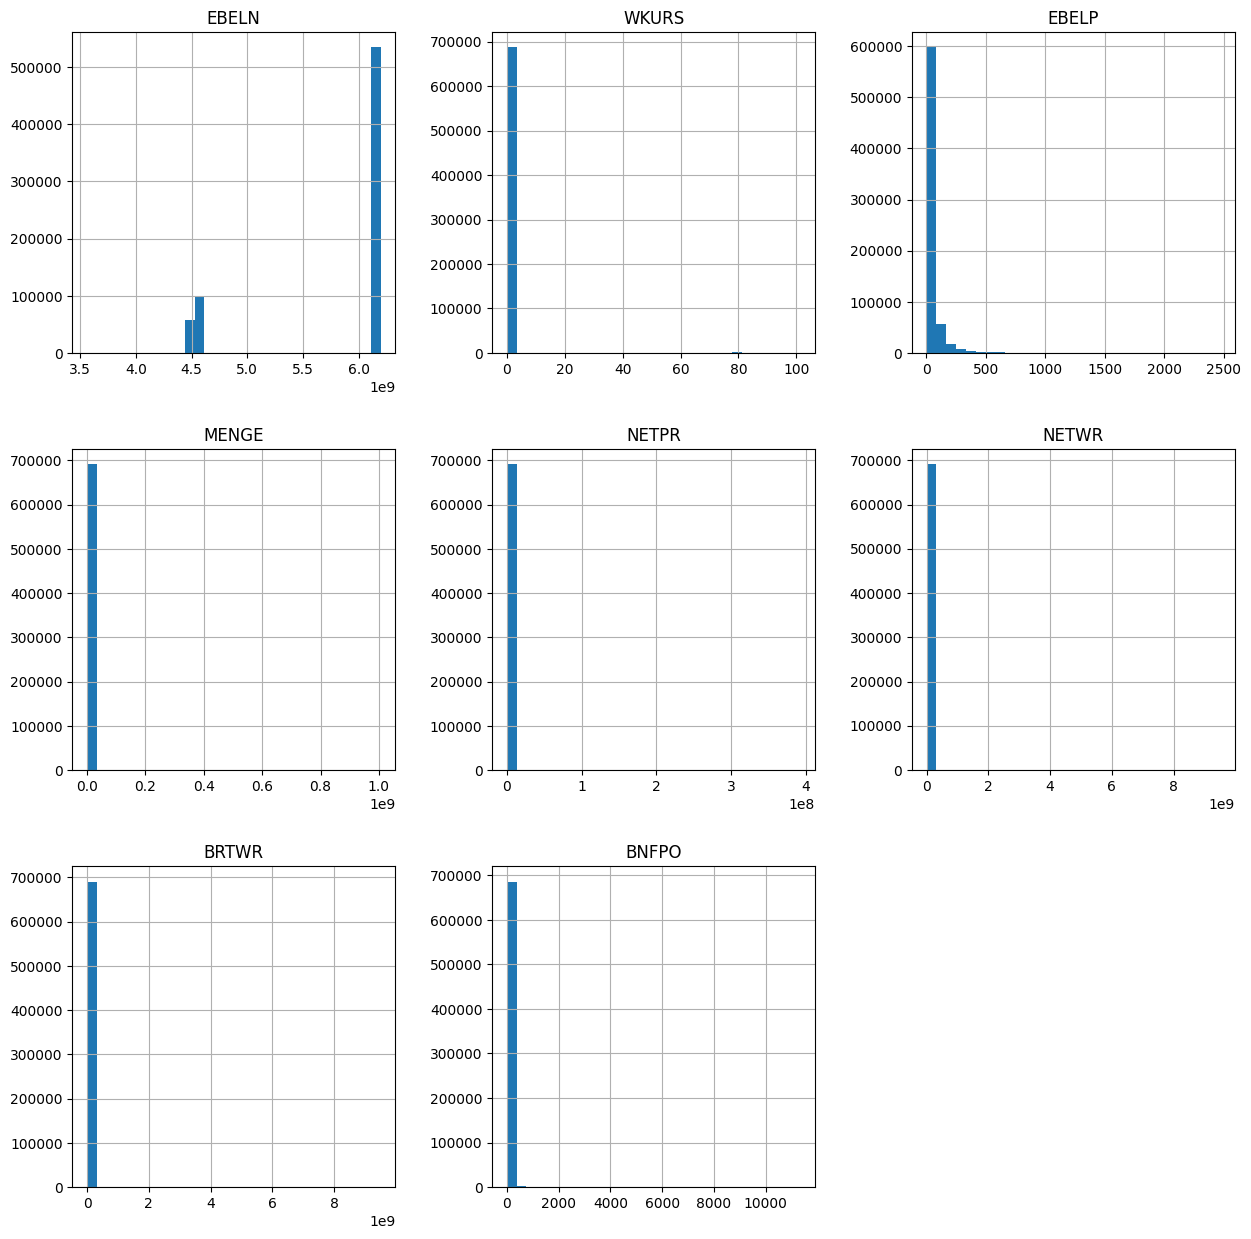

In [29]:
df[continuous_feature].hist(bins=30, figsize=(15,15))
plt.show()

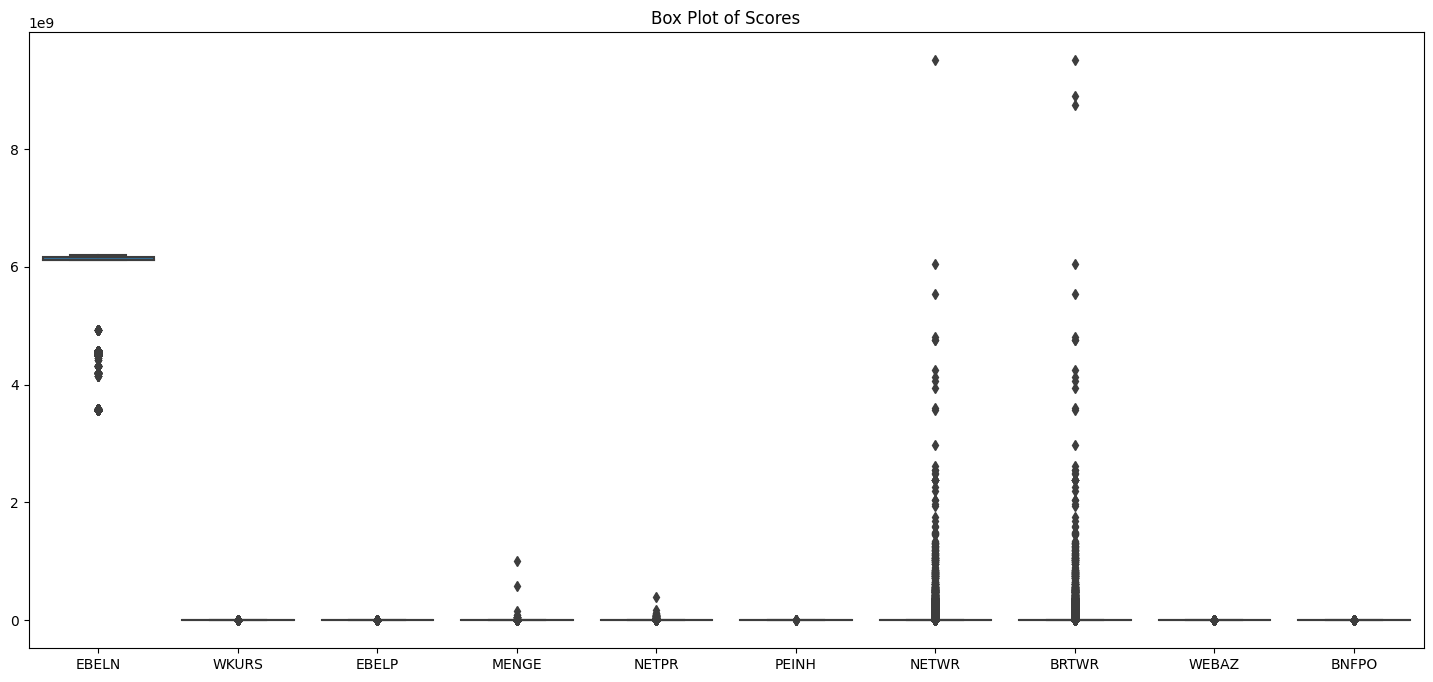

In [31]:
# Set the figure size
plt.figure(figsize=(18, 8))  # Adjust the width and height as desired

# Plot the boxplot
sns.boxplot(data=df)

# Set the title
plt.title("Box Plot of Scores")

# Show the plot
plt.show()

## Categorical Variables

In [32]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['BSTYP',
 'BSART',
 'AEDAT',
 'LIFNR',
 'BEDAT',
 'TXZ01',
 'MATNR',
 'WERKS',
 'MEINS']

In [33]:
df[categorical_features].head()

,BSTYP,BSART,AEDAT,LIFNR,BEDAT,TXZ01,MATNR,WERKS,MEINS
0,F,ZDM6,2022-04-02,0000501277,2022-04-02,"STEEL ALMIRAH,78X36X21IN",000000001000160592,6301,NO
1,F,ZDM6,2022-04-02,0000501277,2022-04-02,"RACK,STEEL",000000001000043086,6301,PC
2,F,ZDM6,2022-04-02,0000010367,2022-04-02,"BOLT,HEX,HT 8.8,IS:1364,M24X80MM",000000001000238212,6301,PC
3,F,ZDM6,2022-04-02,0000010367,2022-04-02,"BOLT,COUPLING,HT 10.9,M16X70MM",000000001000139084,6301,PC
4,F,ZDM6,2022-04-02,0000010367,2022-04-02,"BOLT,COUPLING,HT 10.9,M12X60MM",000000001000147111,6301,PC


In [34]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is BSTYP and number of categories are 3
The feature is BSART and number of categories are 43
The feature is AEDAT and number of categories are 420
The feature is LIFNR and number of categories are 13922
The feature is BEDAT and number of categories are 426
The feature is TXZ01 and number of categories are 80284
The feature is MATNR and number of categories are 145836
The feature is WERKS and number of categories are 288
The feature is MEINS and number of categories are 35


In [35]:
# make a list of the categorical variables that contain missing values

categorical_features_with_na = [
    var for var in categorical_features
    if df[var].isnull().sum() > 0
]

# print percentage of missing values per variable
df[categorical_features_with_na ].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

In [36]:
# variable to impute with the missing indicator
with_string_missing = [
    var for var in categorical_features_with_na if df[var].isnull().mean() > 0.1]

# variables to impute with the most frequent category
with_frequent_category = [
    var for var in categorical_features_with_na if df[var].isnull().mean() < 0.1]

In [37]:
with_string_missing

[]

In [38]:
with_frequent_category

[]

In [39]:
df.to_csv("Cleaned_anomaly_data.csv",index=False)

## Encoding the categorical features over here

In [38]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['NETWR'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [39]:
df

,EBELN,BSTYP,BSART,AEDAT,LIFNR,WKURS,BEDAT,EBELP,TXZ01,MATNR,WERKS,MENGE,MEINS,NETPR,PEINH,NETWR,BRTWR,WEBAZ,BNFPO
0,3561007115,2,22,419,10878,1.000,424,10,44717,115452,216,4.000,19,10800.000,1,43200.000,43200.000,0,10
1,3561007115,2,22,419,10878,1.000,424,20,48933,119766,216,8.000,17,10500.000,1,84000.000,84000.000,0,20
2,3561007116,2,22,419,8924,1.000,424,10,41246,103040,216,300.000,17,103.000,1,30900.000,30900.000,2,10
3,3561007116,2,22,419,8924,1.000,424,20,37526,88746,216,50.000,17,80.000,1,4000.000,4000.000,2,30
4,3561007116,2,22,419,8924,1.000,424,30,22768,87355,216,50.000,17,65.000,1,3250.000,3250.000,2,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690823,6170071163,0,3,64,5956,1.000,70,30,939,4569,1,5.000,17,0.000,1,0.000,0.000,2,0
690824,6170071163,0,3,64,5956,1.000,70,40,1073,4576,1,5.000,17,0.000,1,0.000,0.000,2,0
690825,6198000176,0,2,355,6837,1.000,360,10,68903,5583,178,100.000,17,1700.000,1,0.000,170000.000,0,0
690826,6198000176,0,2,355,6837,1.000,360,20,70880,5495,178,500.000,17,470.000,1,0.000,235000.000,0,0


In [40]:

feature_scale=[feature for feature in df.columns]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [41]:
scaler.transform(df[feature_scale])

array([[0.00000000e+00, 1.00000000e+00, 5.23809524e-01, ...,
        4.54478507e-06, 0.00000000e+00, 8.81834215e-04],
       [0.00000000e+00, 1.00000000e+00, 5.23809524e-01, ...,
        8.83708208e-06, 0.00000000e+00, 1.76366843e-03],
       [3.79219767e-10, 1.00000000e+00, 5.23809524e-01, ...,
        3.25078377e-06, 6.66666667e-02, 8.81834215e-04],
       ...,
       [1.00000000e+00, 0.00000000e+00, 4.76190476e-02, ...,
        1.78845709e-05, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 4.76190476e-02, ...,
        2.47227892e-05, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 4.76190476e-02, ...,
        1.78845709e-05, 0.00000000e+00, 0.00000000e+00]])

In [42]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [43]:
data

,EBELN,BSTYP,BSART,AEDAT,LIFNR,WKURS,BEDAT,EBELP,TXZ01,MATNR,WERKS,MENGE,MEINS,NETPR,PEINH,NETWR,BRTWR,WEBAZ,BNFPO
0,0.000,1.000,0.524,1.000,0.781,0.010,0.998,0.004,0.557,0.792,0.753,0.000,0.559,0.000,0.001,0.000,0.000,0.000,0.001
1,0.000,1.000,0.524,1.000,0.781,0.010,0.998,0.008,0.610,0.821,0.753,0.000,0.500,0.000,0.001,0.000,0.000,0.000,0.002
2,0.000,1.000,0.524,1.000,0.641,0.010,0.998,0.004,0.514,0.707,0.753,0.000,0.500,0.000,0.001,0.000,0.000,0.067,0.001
3,0.000,1.000,0.524,1.000,0.641,0.010,0.998,0.008,0.467,0.609,0.753,0.000,0.500,0.000,0.001,0.000,0.000,0.067,0.003
4,0.000,1.000,0.524,1.000,0.641,0.010,0.998,0.012,0.284,0.599,0.753,0.000,0.500,0.000,0.001,0.000,0.000,0.067,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690823,0.989,0.000,0.071,0.153,0.428,0.010,0.165,0.012,0.012,0.031,0.003,0.000,0.500,0.000,0.001,0.000,0.000,0.067,0.000
690824,0.989,0.000,0.071,0.153,0.428,0.010,0.165,0.016,0.013,0.031,0.003,0.000,0.500,0.000,0.001,0.000,0.000,0.067,0.000
690825,1.000,0.000,0.048,0.847,0.491,0.010,0.847,0.004,0.858,0.038,0.620,0.000,0.500,0.000,0.001,0.000,0.000,0.000,0.000
690826,1.000,0.000,0.048,0.847,0.491,0.010,0.847,0.008,0.883,0.038,0.620,0.000,0.500,0.000,0.001,0.000,0.000,0.000,0.000


In [44]:
data.to_csv("infraredtable1.csv",index=False)

In [45]:
import pandas as pd



# Retain only 100,000 observations
data = data.head(100000)

# Save the modified data to a new CSV file
data.to_csv("finalInfraredData.csv", index=False)

In [46]:
data

,EBELN,BSTYP,BSART,AEDAT,LIFNR,WKURS,BEDAT,EBELP,TXZ01,MATNR,WERKS,MENGE,MEINS,NETPR,PEINH,NETWR,BRTWR,WEBAZ,BNFPO
0,0.000,1.000,0.524,1.000,0.781,0.010,0.998,0.004,0.557,0.792,0.753,0.000,0.559,0.000,0.001,0.000,0.000,0.000,0.001
1,0.000,1.000,0.524,1.000,0.781,0.010,0.998,0.008,0.610,0.821,0.753,0.000,0.500,0.000,0.001,0.000,0.000,0.000,0.002
2,0.000,1.000,0.524,1.000,0.641,0.010,0.998,0.004,0.514,0.707,0.753,0.000,0.500,0.000,0.001,0.000,0.000,0.067,0.001
3,0.000,1.000,0.524,1.000,0.641,0.010,0.998,0.008,0.467,0.609,0.753,0.000,0.500,0.000,0.001,0.000,0.000,0.067,0.003
4,0.000,1.000,0.524,1.000,0.641,0.010,0.998,0.012,0.284,0.599,0.753,0.000,0.500,0.000,0.001,0.000,0.000,0.067,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.360,1.000,0.619,0.604,0.605,0.010,0.607,0.024,0.254,0.614,0.192,0.000,0.500,0.000,0.001,0.000,0.000,0.067,0.006
99996,0.360,1.000,0.619,0.604,0.605,0.010,0.607,0.028,0.459,0.710,0.192,0.000,0.500,0.000,0.001,0.000,0.000,0.067,0.007
99997,0.360,1.000,0.619,0.604,0.605,0.010,0.607,0.032,0.114,0.516,0.192,0.000,0.500,0.000,0.001,0.000,0.000,0.067,0.008
99998,0.360,1.000,0.619,0.604,0.605,0.010,0.607,0.036,0.289,0.630,0.192,0.000,0.500,0.000,0.001,0.000,0.000,0.067,0.009
